# Employee Turnover Analytics

In [183]:
import pandas as pd
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


__Q 1.__ Perform data quality checks by checking for missing values, if any

In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

- Data has no missing values in any column

In [15]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [17]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

__Q 2.__ Understand what factors contributed most to employee turnover at EDA

__Q 2.1__ Draw a heatmap of the correlation matrix between all numerical 
features or columns in the data

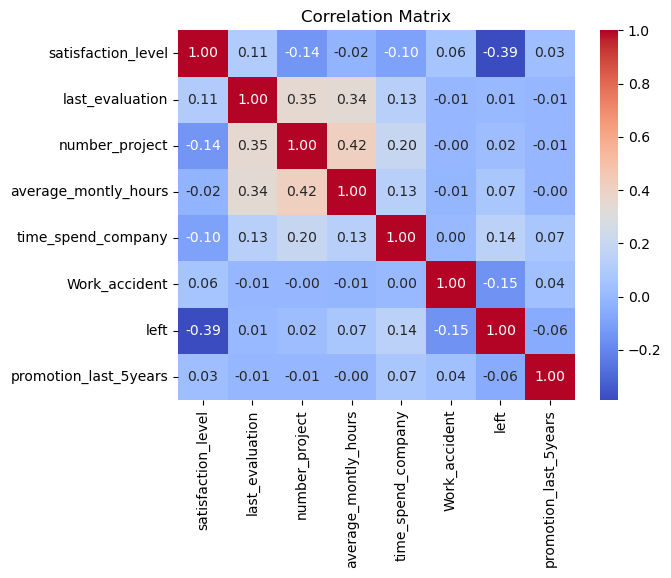

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr=df.select_dtypes(include='number')
corr_mat=df_corr.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- We can see that the correlation between `average_montly_hours` and `number_project` is high among all

__Q 2.2__ Draw the distribution plot of Employee Satisfaction (use column satisfaction_level)

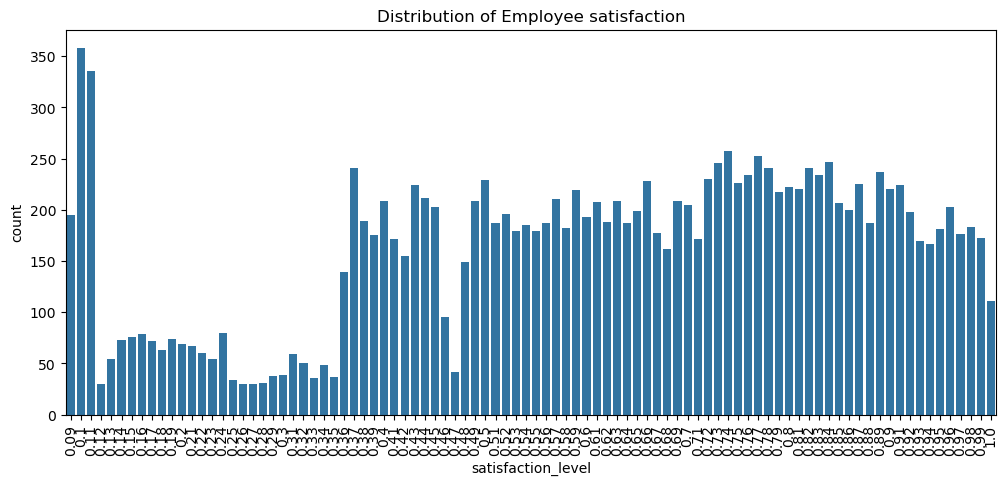

In [168]:
# distribution of employee satisfaction

plt.figure(figsize=(12,5))
sns.countplot(x='satisfaction_level', data=df)
plt.title('Distribution of Employee satisfaction')
plt.xticks(rotation=90)
plt.show()

In [171]:
df[df['satisfaction_level']==0.09].shape

(195, 10)

In [173]:
df[df['satisfaction_level']==1.0].shape

(111, 10)

- Satisfaction level at job of an employee from 0.09 to 1.0. highest number of employees, 358 employees, have 0.1 satisfaction_level and 111 employees has highest 1.0 satisfaction_level. 195 employees has lowest satisfaction level 0.09.
- We can also see the distribution of satisfation_level by __histogram withe kde__ which is below

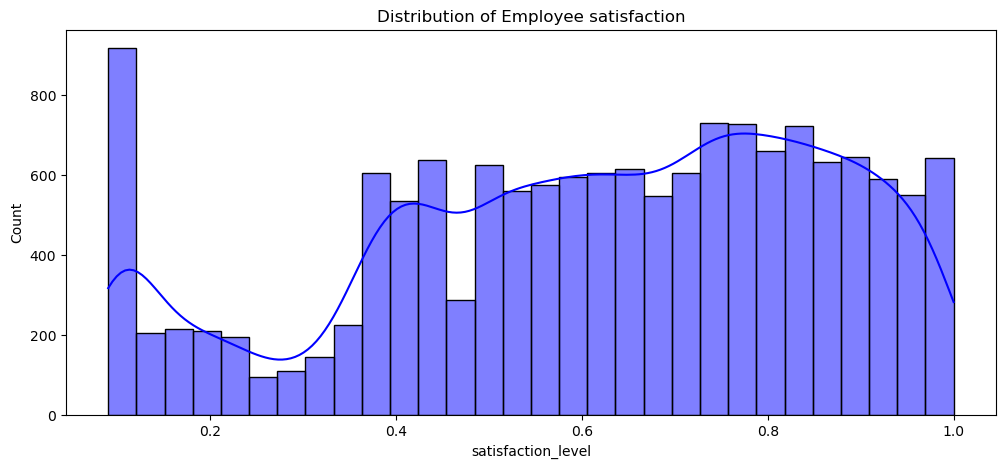

In [176]:
# Histogram of employee satisfaction 

plt.figure(figsize=(12,5))
sns.histplot(df['satisfaction_level'], bins=30, kde=True, color='blue')
plt.title('Distribution of Employee satisfaction')
plt.show()

- It shows how satisfaction levels are spread across employees, with a KDE (Kernel Density Estimation) curve to highlight the overall trend.

__Q 2.2__ Draw the distribution plot of Employee Evaluation (use column last_evaluation)

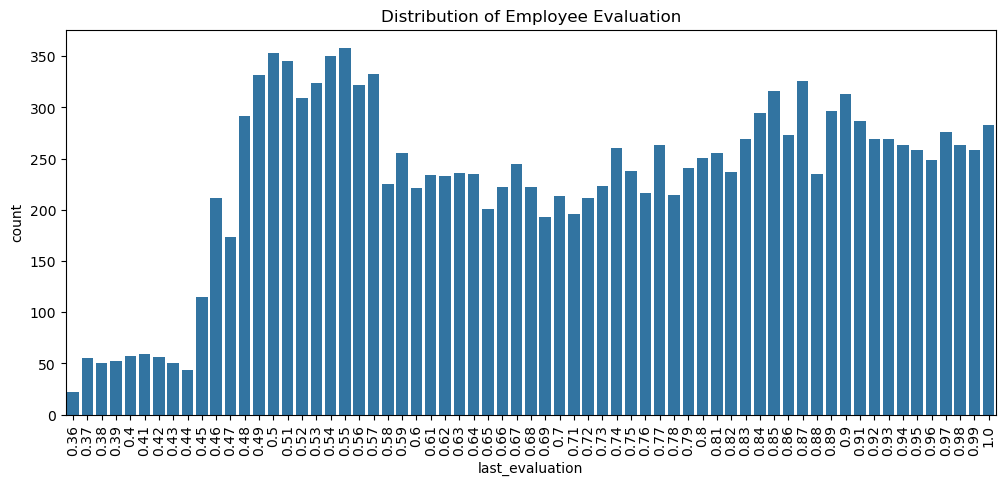

In [179]:
# distribution of Employee Evaluation

plt.figure(figsize=(12,5))
sns.countplot(x='last_evaluation', data=df)
plt.title('Distribution of Employee Evaluation')
plt.xticks(rotation=90)
plt.show()

In [185]:
df[df['last_evaluation']==0.36].shape

(22, 10)

In [189]:
df[df['last_evaluation']==1.0].shape

(283, 10)

- Employee evaluation range level from 0.36 to 1.0. 22 employees have the least evaluation  of 0.36 and 283 employees have the highest evaluate of 1.0

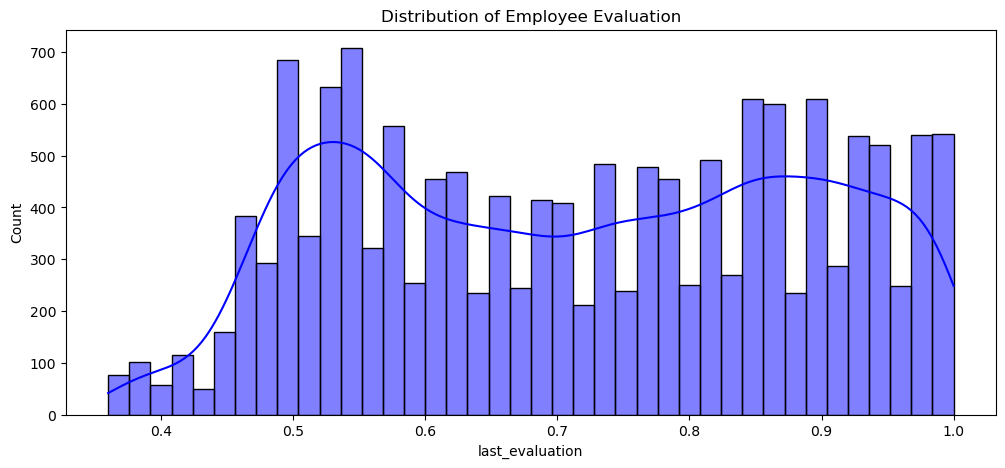

In [183]:
# Histogram of employee evaluation

plt.figure(figsize=(12,5))
sns.histplot(df['last_evaluation'], bins=40, kde=True, color='blue')
plt.title('Distribution of Employee Evaluation')
plt.show()

Histogram with a KDE (Kernel Density Estimation) curve to highlight the overall trend of employee evaluation

__Q 2.2__ Draw the distribution plot of Employee Average Monthly Hours (use column 
average_montly_hours)

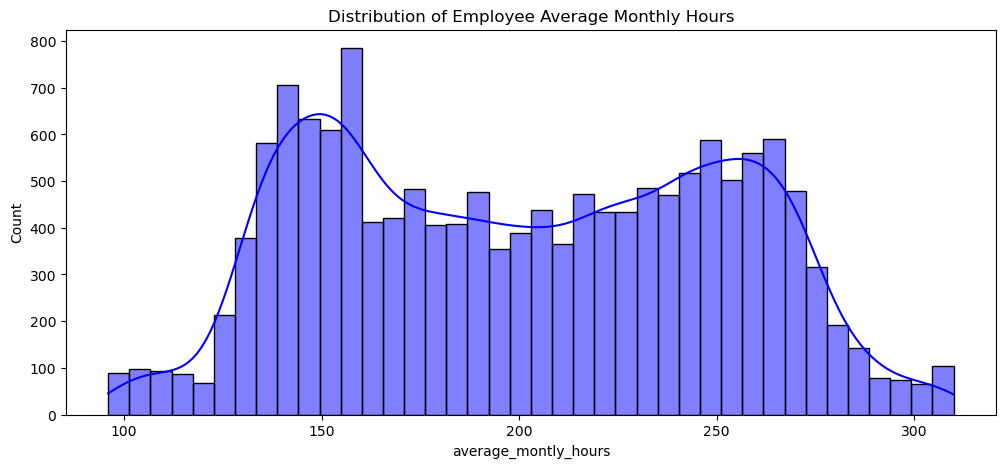

In [199]:
# Histogram of Employee Average Monthly Hours

plt.figure(figsize=(12,5))
sns.histplot(df['average_montly_hours'], bins=40, kde=True, color='blue')
plt.title('Distribution of Employee Average Monthly Hours')
plt.show()

In [217]:
df['average_montly_hours'].value_counts().max()

153

In [221]:
df['average_montly_hours'].value_counts().min()

6

In [219]:
df[df['average_montly_hours']==153].shape

(122, 10)

In [209]:
df['average_montly_hours'].min()

96

In [211]:
df[df['average_montly_hours']==96].shape

(6, 10)

In [213]:
df[df['average_montly_hours']==310].shape

(18, 10)

In [215]:
df['average_montly_hours'].value_counts()

average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64

- Histplot shows how the Average Monthly Hours across employees, with a KDE (Kernel Density Estimation) curve to highlight the overall Employee Average Monthly Hours trend.

__Q 2.3__ Draw the bar plot of the employee project count of both employees 
who left and stayed in the organization (use column number_projec 
and hue column left), and give your inferences from the plot.

In [233]:
df['number_project'].value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

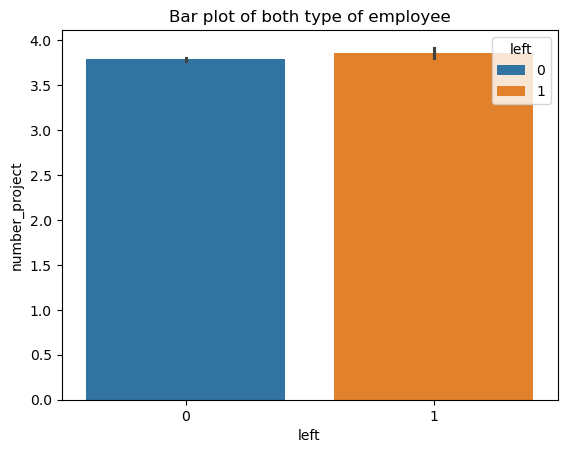

In [295]:
# Bar plot of  both type employee 

sns.barplot(x='left', y='number_project', data=df, hue='left')
plt.title('Bar plot of both type of employee')
plt.show()

- From the above plot we conclude that the employee left(1, orange color) the company was involved in more projects in the comparision of the employee stays(0, blue color) with the company

__Q 3.__ Perform clustering of employees who left based on their satisfaction and 
evaluation.

__Q 3.1__ Choose columns satisfaction_level, last_evaluation, and left.

In [351]:
# Filter data for employees who left

x=df[df['left'] == 1][['satisfaction_level', 'last_evaluation']].values

__Q 3.2__ Do K-means clustering of employees who left the company into 3 
clusters?

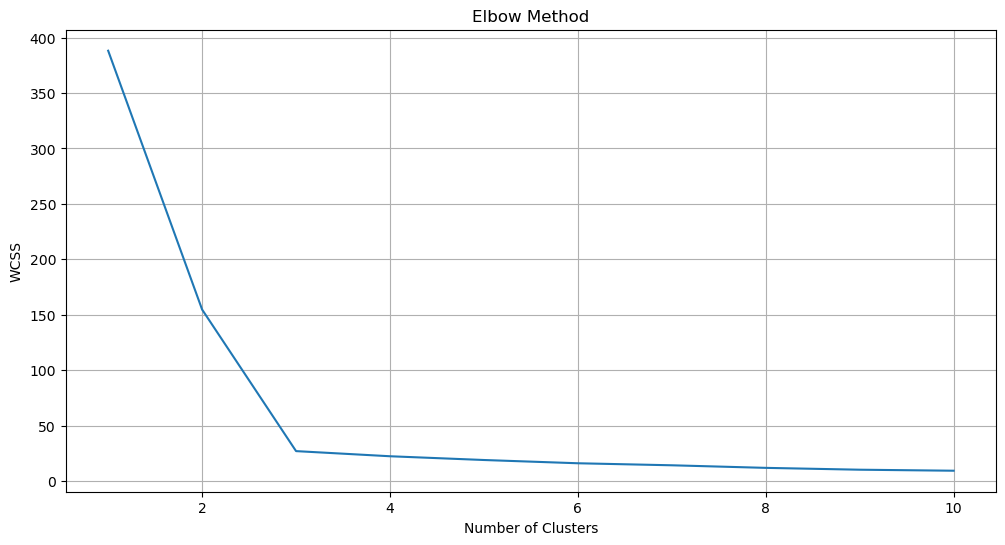

In [353]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

- The optimal number of cluster of employees who left the company based on satisfaction and evaluation factor is 3 

__Q 3.3__ Based on the satisfaction and evaluation factors, give your thoughts 
on the employee clusters.

In [356]:
# Train the k-means model with the optimal number of cluster 3

model = KMeans(n_clusters=3, n_init=10, init='k-means++', random_state=42)
model.fit(x)
y_kmeans=model.predict(x)

In [358]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 0])

In [360]:
import numpy as np
np.unique(y_kmeans)

array([0, 1, 2])

In [362]:
x.shape

(3571, 2)

In [364]:
y_kmeans.shape

(3571,)

In [366]:
model.cluster_centers_

array([[0.41014545, 0.51698182],
       [0.80851586, 0.91170931],
       [0.11115466, 0.86930085]])

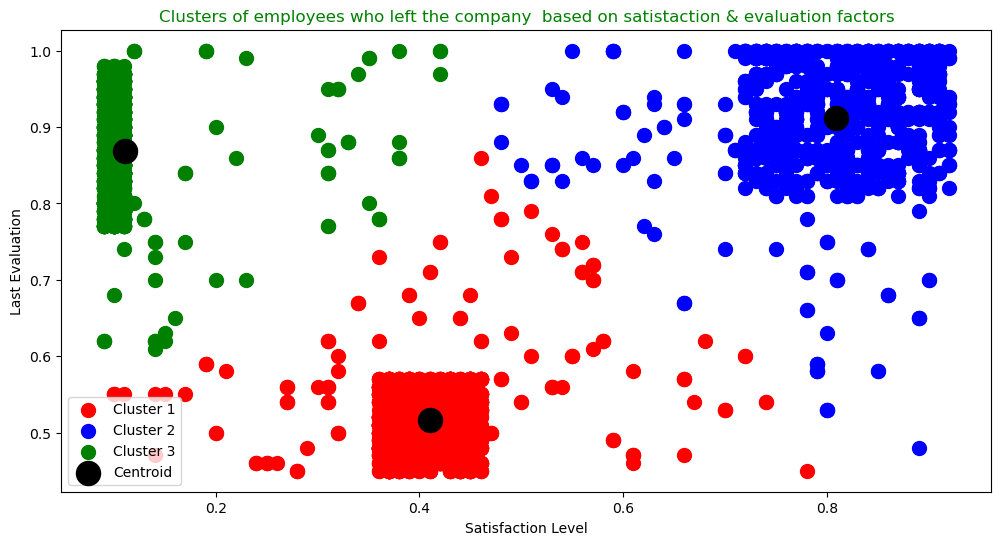

In [382]:
# Visualize the clusters with centroid

plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='black', label='Centroid')
plt.title('Clusters of employees who left the company  based on satistaction & evaluation factors', c='green')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

K-Means clusters with K=3

__Observation__

- __Cluster 3(Green):__ Employees with low Satisfaction and High evaluation score, indicating high performers. Possibly these employees might feel undervalued or insufficiently rewarded leading to dissatisfied and left the company.
- __Cluster 1(Red):__ Employees with moderate satisfaction and low to moderate evaluation scores, indicating average performers. Possibly these employees might feel lack of motivation and skills in their roles leading to lead the company. The compay should offer training and development programs to enhance skills and engagement to those employees.
- __Cluster 2(Blue):__ Employees with High Satisfaction and high evaluation scores, indicating highly satisfied and well-evaluated employees. Maybe in company new challenges not available for current role, or getting better opportunities from other companies or for better carrer prospects, due to this reason left the company.

__Q 4.__ Handle the left Class Imbalance using the SMOTE technique.

In [384]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

__Q 4.1__ Pre process the data by converting categorical columns to numerical columns by seperating categorical variables and numerical variables and applying get_dummies() to the categorical variables

In [185]:
# one-hot encoding and label encoding for categorical features

dummies=pd.get_dummies(df['sales'],dtype=int)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dummies['salary']=label_encoder.fit_transform(df['salary'])

In [187]:
dummies.columns

Index(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical', 'salary'],
      dtype='object')

I used one-hot encoding for `sales` because it is nominal categorical column and label encoding for `salary` because it is ordinal categorical column

In [190]:
# split the dataset into numerical features and dependent set

x_numerical=df.drop(['sales', 'salary', 'left'],axis=1).astype('float64')
list_numerical=x_numerical.columns
y=df['left']

In [192]:
list_numerical

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')

__Q 4.1__ Combining categorical and numerical columns

In [202]:
# create actual independent variable x with dummies variable

x=pd.concat([x_numerical, dummies], axis=1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1


__Q 4.2__ Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

In [204]:
# stratified split of the dataset to train and test

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
# Perform stratified split
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

- I used StratifiedShuffleSplit for stratified split of the dataset to train and test with n_splits=1
- A point is that we can also use train_test_split for stratified split of  x,y in training and testing set. The result from  both class StratifiedShuffleSplit for n_splits=1, and train_test_split by assigning the parameters stratify=y, shuffle=True is same.

- train_test_split code as below for stratified split:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=123)

In [207]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
6197,0.15,0.39,5.0,229.0,4.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1
1955,0.09,0.81,6.0,257.0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
9440,0.57,0.49,2.0,237.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
9365,0.85,0.59,2.0,264.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
7725,0.16,0.72,4.0,192.0,6.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,0.69,0.82,4.0,272.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1
9372,0.22,0.74,5.0,178.0,5.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1
1574,0.36,0.51,2.0,129.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1
8994,0.58,0.79,4.0,130.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,2


In [209]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train[list_numerical])
x_train.loc[:, list_numerical]=scaler.transform(x_train[list_numerical])
x_test.loc[:, list_numerical]=scaler.transform(x_test[list_numerical])

In [211]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary
6197,-1.862862,-1.900843,0.97280,0.563659,0.344888,-0.411003,-0.148237,0,0,0,0,0,0,0,1,0,0,1
1955,-2.104377,0.555873,1.78594,1.124295,0.344888,-0.411003,-0.148237,0,0,0,0,0,0,0,0,1,0,1
9440,-0.172258,-1.315910,-1.46662,0.723841,-1.027914,-0.411003,-0.148237,0,0,0,0,0,0,0,0,1,0,1
9365,0.954811,-0.730978,-1.46662,1.264454,-1.027914,-0.411003,-0.148237,0,0,0,0,0,0,0,0,1,0,1
7725,-1.822610,0.029434,0.15966,-0.177181,1.717690,-0.411003,-0.148237,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,0.310772,0.614367,0.15966,1.424635,-1.027914,-0.411003,-0.148237,0,0,0,0,0,0,0,0,0,1,1
9372,-1.581095,0.146421,0.97280,-0.457498,1.031289,-0.411003,-0.148237,1,0,0,0,0,0,0,0,0,0,1
1574,-1.017560,-1.198924,-1.46662,-1.438610,-0.341513,-0.411003,-0.148237,0,0,0,0,0,0,0,0,1,0,1
8994,-0.132006,0.438887,0.15966,-1.418588,-0.341513,-0.411003,-0.148237,1,0,0,0,0,0,0,0,0,0,2


In [215]:
# Convert DataFrame to NumPy array

x_train_np = x_train.to_numpy()

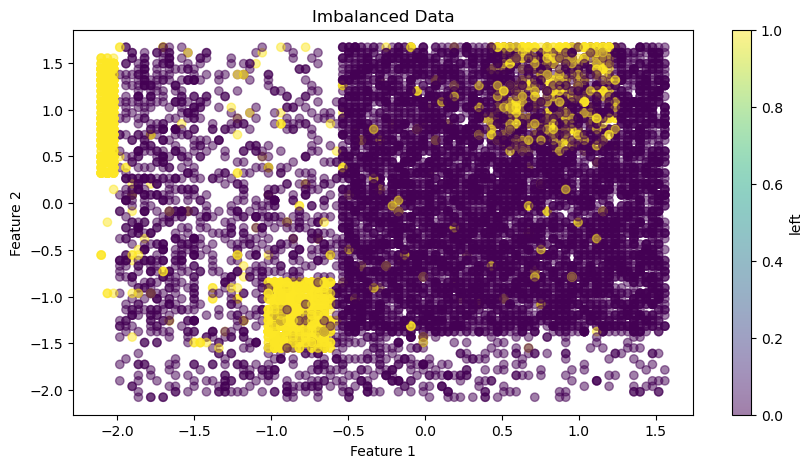

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(x_train_np[:, 0], x_train_np[:, 1], c=y_train, alpha=0.5,  marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='left')
plt.show()

There are predominantly purple points, indicating a majority of data points belong to the class close to 0.0. Yellow points, indicating data points with a class close to 1.0, are fewer in comparison.

__Q 4.3__ Upsample the train dataset using the SMOTE technique from the 
imblearn module

__Apply oversampling technique SMOTE to balance the data__

In [221]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_np, y_train)

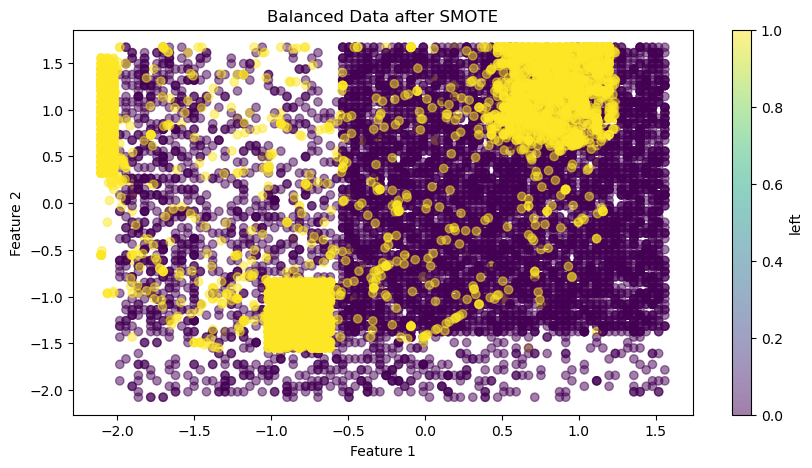

In [223]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train_smote[:, 0], x_train_smote[:, 1], c=y_train_smote, alpha=0.5,  marker='o')
plt.title('Balanced Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='left')
plt.show()

We observe that after oversampling yellow points (class 1) increased and now data is balanced

In [226]:
x_train_smote[:,0].shape

(18284,)

In [228]:
x_train_smote[:,1].shape

(18284,)

In [230]:
y_train_smote.shape

(18284,)

__Q 5.__ Perform 5-fold cross-validation model training and evaluate performance.

__Q 5.1__ Train a Logistic Regression model, apply a 5-fold cv, and plot the 
classification report.

__Train and Evaluate logistic regression on oversampled data__

In [233]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [235]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(model, x_train_smote, y_train_smote, cv=5)
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Scores : [0.75088871 0.7593656  0.75170905 0.76920973 0.76394967]
CV Scores Mean : 0.7590245528942725


cv scores of balanced data is consistent and no bias so model is more consistent

In [241]:
import numpy as np
from sklearn.metrics import accuracy_score
y_train_pred=model.predict(np.array(x_train_smote))
y_test_pred=model.predict(np.array(x_test))

training_accuracy=accuracy_score(y_train_smote, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('Logistic Regression :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Logistic Regression :
Training Accuracy : 0.7589695908991468
Testing Accuracy : 0.7556666666666667


The Logistic Regression model, when trained on the SMOTE-balanced dataset, achieved accuracy on both the training (75.9%) and testing (75.6%) sets, indicating strong model performance without overfitting.  The model generalizes well on training as well as testing set

Confusion Matrix :
[[1696  590]
 [ 143  571]]


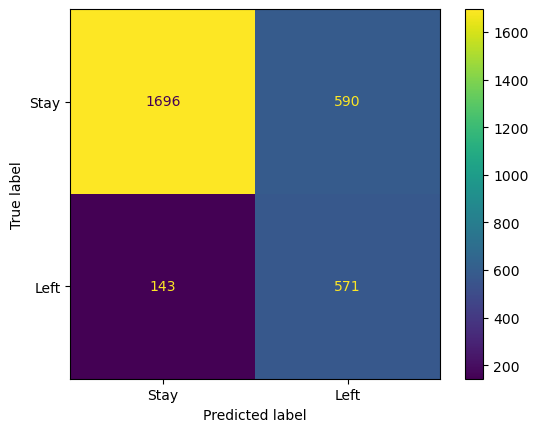

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)

# Display confusion matrix

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Stay', 'Left'])
cm_display.plot()
plt.show()

__Observation__

- Stay is negative class(0) and left is positive class(1)
- TN=1696, FN=590, FP=143, TP=571
- In the HR dataset, 1696 employees stayed in the company and the model correctly predicted as 1696 employees are in company.
- In the HR dataset, 590 employees stayed in the company but the model incorrectly predicted as they left the company.
- In the HR dataset, 143 employees left the company but the model incorrectly predicted as they stayed in the company.
- In the HR dataset, 571 employees left the company and the model correctly predicted as they left the company.
- Out of 3000 instances, 733 instances incorrectly predicted

In [247]:
print('Logistic Regression Classification Report :')
print()
print(classification_report(y_test, y_test_pred))

Logistic Regression Classification Report :

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2286
           1       0.49      0.80      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.77      3000



In [279]:
y_pred_prob=model.predict_proba(np.array(x_test))[:,1]
result=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred,
    'Predicted Probability' : y_pred_prob
})
result

,Actual,Predicted,Predicted Probability
10627,0,0,0.107878
2703,0,1,0.760815
6059,0,1,0.536605
3258,0,0,0.276866
4565,0,0,0.358601
...,...,...,...
4961,0,0,0.050099
4557,0,0,0.123060
6610,0,0,0.293597
10327,0,0,0.257695


Optimal Threshold : 0.4536153673789293


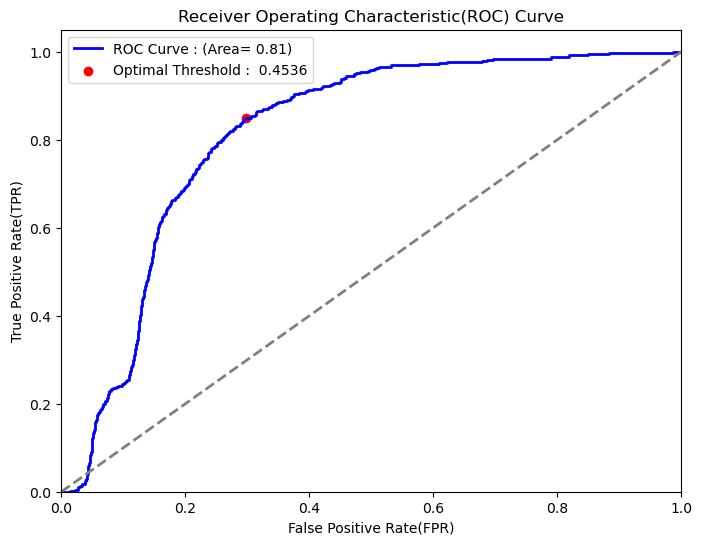

In [273]:
# plot roc curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print('Optimal Threshold :',optimal_threshold)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve : (Area={roc_auc : .2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold : {optimal_threshold : .4f}')
plt.plot([0,1],[0,1], lw=2, color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()

__Observation__

- The AUC is 0.81 means model has good discrimination ability. It is better than the random guessing(AUC=0.5) and can distinguish between the positive and negative classes fairly well.
- The ROC not reaching to (0,1) suggests that model might not be performing well at certain decision thresholds.
- The slight part of the ROC curve below the random guessing line suggests that at certain thresholds, model is making worse-than-random predictions.
- AUC=0.81 means model is fairly strong overall but ROC curve shape suggests that performance is inconsistent at certain thresholds

__Q 5.2__ Train a Random Forest Classifier model, apply a 5-fold cv, and plot the classification report

__Random Forest Classifier__

In [284]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [291]:
cv_scores=cross_val_score(rf_model, x_train, y_train, cv=5)
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Scores : [0.98541667 0.99208333 0.99291667 0.9875     0.98874531]
CV Scores Mean : 0.9893323954425455


The scores are very close to each other, meaning the model's performance is consistent and low varience across different folds. This suggests model is well-trained and effective.

In [299]:
from sklearn.metrics import accuracy_score
y_train_pred_rf=rf_model.predict(np.array(x_train_smote))
y_test_pred_rf=rf_model.predict(np.array(x_test))

training_accuracy=accuracy_score(y_train_smote, y_train_pred_rf)
testing_accuracy=accuracy_score(y_test, y_test_pred_rf)

print('Random Forest Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Random Forest Classifier :
Training Accuracy : 1.0
Testing Accuracy : 0.992


Training Accuracy is 1.0 means model perfectly learned the training set and testing accuracy is 0.992 which is very high so model generalize well on unseen data. Since, their is slight difference 0.008 so model is not overfitted. 

Confusion Matrix :
[[2276   10]
 [  14  700]]


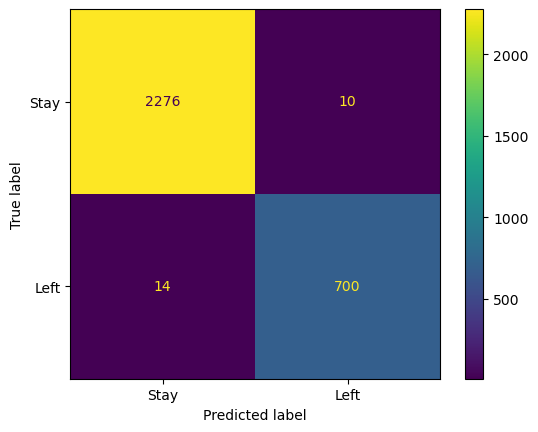

In [301]:
conf_mat=confusion_matrix(y_test, y_test_pred_rf)
print('Confusion Matrix :')
print(conf_mat)

# Display confusion matrix

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Stay', 'Left'])
cm_display.plot()
plt.show()

__Observation__

- TN=2276, FN=10, FP=14, TP=700
- In the HR dataset, 2276 employees stayed in the company and the model correctly predicted as 2276 employees are in company
- In the HR dataset, 10 employees stayed in the company but the model incorrectly predicted as they left the company.
- In the HR dataset, 14 employees left the company but the model incorrectly predicted as they stay in the company.
- In the HR dataset, 700 employees left the company and the model correctly predicted as they left the company.

In [305]:
print('Random Forest Classifier Classification Report :')
print()
print(classification_report(y_test, y_test_pred_rf))

Random Forest Classifier Classification Report :

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [311]:
y_pred_prob_rf=rf_model.predict_proba(np.array(x_test))[:,1]
result_rf=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_rf,
    'Predicted Probability' : y_pred_prob_rf
})
result_rf

,Actual,Predicted,Predicted Probability
10627,0,0,0.00
2703,0,0,0.26
6059,0,0,0.09
3258,0,0,0.02
4565,0,0,0.03
...,...,...,...
4961,0,0,0.00
4557,0,0,0.01
6610,0,0,0.03
10327,0,0,0.02


Optimal Threshold : 0.49


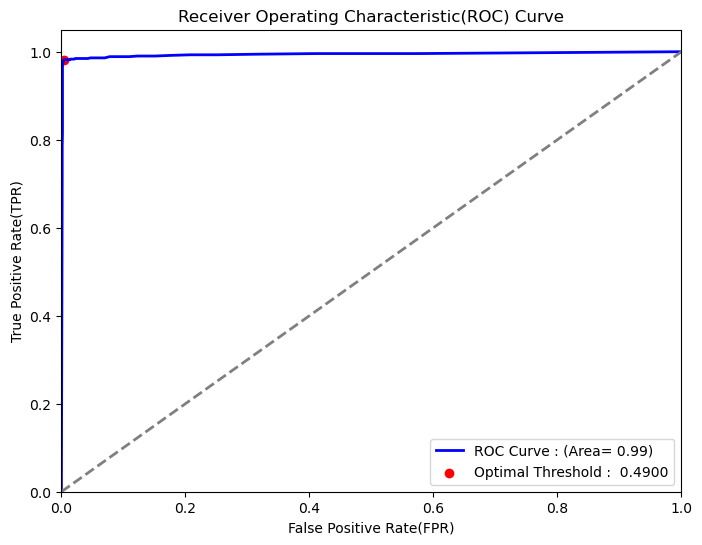

In [313]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print('Optimal Threshold :',optimal_threshold)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve : (Area={roc_auc : .2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold : {optimal_threshold : .4f}')
plt.plot([0,1],[0,1], lw=2, color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()

__Observation__

- The ROC curve in the image reaches near the top-left corner (TPR = 1, FPR = 0), which indicates an excellent classification performance. The model strongly distinguishes between the positive and negative classes at various threshold settings.
- The ROC curve for the Random Forest classifier has AUC of 0.99. This indicates that the model has excellent discriminatory power. An AUC of 0.99 means the model correctly classifies 99 % positive and negative instances.

__Q 5.3__ Train a Gradient Boosting Classifier model, apply a 5-fold cv, and plot the classification report

__Gradient Boosting Classifier__

In [350]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier(n_estimators=1000, max_depth=5, random_state=42)
gb_model.fit(x_train_smote, y_train_smote)

GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=42)

In [352]:
cv_scores=cross_val_score(gb_model, x_train, y_train, cv=5)
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Scores : [0.98333333 0.99041667 0.99041667 0.98583333 0.98624427]
CV Scores Mean : 0.9872488536890371


The scores are very close to each other, meaning the model's performance is consistent and low varience across different folds. This suggests model is well-trained and effective.

In [354]:
y_train_pred_gb=gb_model.predict(np.array(x_train_smote))
y_test_pred_gb=gb_model.predict(np.array(x_test))

training_accuracy=accuracy_score(y_train_smote, y_train_pred_gb)
testing_accuracy=accuracy_score(y_test, y_test_pred_gb)

print('Gradient Boosting Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Gradient Boosting Classifier :
Training Accuracy : 1.0
Testing Accuracy : 0.988


Training Accuracy is 1.0 means model perfectly learned the training set and testing accuracy is 0.988 which is very high so model generalize well on unseen data. Since, their is slight difference 0.012 so model is not overfitted.

Confusion Matrix :
[[2262   24]
 [  12  702]]


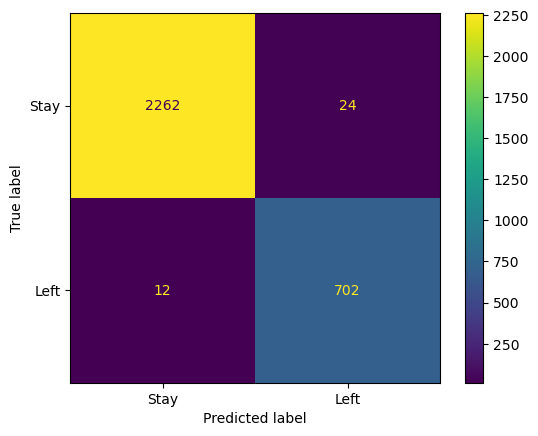

In [356]:
conf_mat=confusion_matrix(y_test, y_test_pred_gb)
print('Confusion Matrix :')
print(conf_mat)

# Display confusion matrix

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Stay', 'Left'])
cm_display.plot()
plt.show()

- TN=2262, There are 2262 employeess stayed in the company and model correctly predicted as the stay in the company
- FN=24, There are 24 employeess stayed in the company but model incorrectly predicted as they left the company
- FP=12, There are 12 employeess left the company but model incorrectly predicted as they stay in the company
- TP=702, There are 702 employeess left the company and model correctly predicted as they are not in the company

In [358]:
print('Gradient Boosting Classifier Classification Report :')
print()
print(classification_report(y_test, y_test_pred_gb))

Gradient Boosting Classifier Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [363]:
y_pred_prob_gb=gb_model.predict_proba(np.array(x_test))[:,1]
result_gb=pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_test_pred_gb,
    'Predicted Probability' : y_pred_prob_gb
})
result_gb

,Actual,Predicted,Predicted Probability
10627,0,0,6.334622e-06
2703,0,1,9.973131e-01
6059,0,0,5.208586e-04
3258,0,0,4.307141e-05
4565,0,0,5.619946e-06
...,...,...,...
4961,0,0,3.972852e-05
4557,0,0,1.952736e-05
6610,0,0,6.978163e-05
10327,0,0,5.405063e-07


Optimal Threshold : 0.7702163709801739


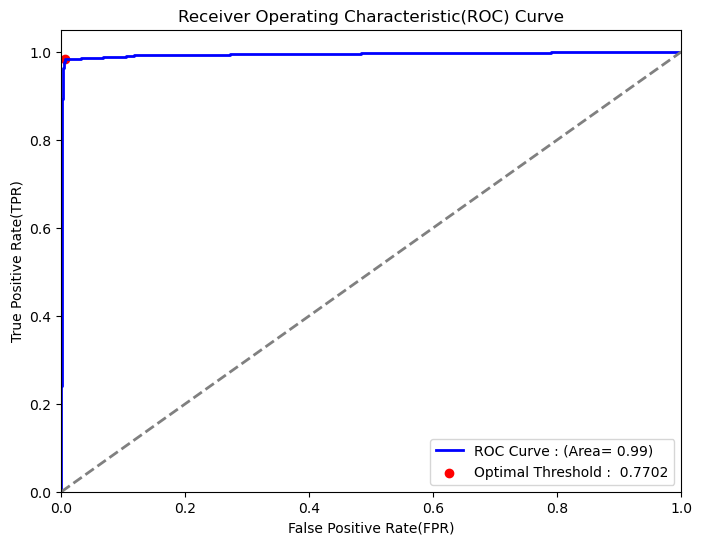

In [365]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)
roc_auc = auc(fpr, tpr)
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print('Optimal Threshold :',optimal_threshold)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve : (Area={roc_auc : .2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold : {optimal_threshold : .4f}')
plt.plot([0,1],[0,1], lw=2, color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend()
plt.show()

- The ROC curve in the image reaches near the top-left corner (TPR = 1, FPR = 0), which indicates an excellent classification performance. The model strongly distinguishes between the positive and negative classes at various threshold settings.
- The ROC curve for the Random Forest classifier has AUC of 0.99. This indicates that the model has excellent discriminatory power. An AUC of 0.99 means the model correctly classifies 99 % positive and negative instances.

__Q 6.__ Identify the best model and justify the evaluation metrics used.

__Observation__

From above observations __Random Forest Classifier is the best model__. Although Random Forest Classifier and Gradient Boost Classifier have high training and testing accuracy but testing accuracy of Gradient Boost classifier is less than Random Forest Classifier. Also, Gradient Boost classifier incorrectly predict 36 instances but Random forest incorrectly predict only 14. and the main reason is that Random Forest Classifier maintain perfect training accuracy and high testing accuracy without any use of parameter in model but in Gradient Boosting Classifier without using parameter n_estimator and max_depth it has not high accuracy score. so in this there is significant role of parameter. that is why Random Forest Classifier is the best model for this dataset.

__Q 6.1 & 6.2__ ROC curve and confusion matrix for each model already plotted above.

__Q 6.3 Explain which metric needs to be used from the confusion matrix: 
Recall or Precisio?__

__Ans:__ Since, For Random Forest Classifier, AUC is approx 1 and also optimal threshold is approx 0.5 and i balanced the imbalance data using smote and also FN=10 and FP=14 which have not much difference so, the metric Recall is used from confusion matrixn

__Q 7.__ Suggest various retention strategies for targeted employees.

__Q 7.1__ Using the best model, predict the probability of employee turnover 
in the test data

In [458]:
# Show top 5 employees with highest risk of leaving

test_predictions = pd.DataFrame({'Employee_ID': test_index,   # Employee index in dataset
                                 'Turnover_Probability': y_pred_prob_rf
})

print(test_predictions.sort_values(by='Turnover_Probability', ascending=False).head())

      Employee_ID  Turnover_Probability
1500        14851                   1.0
1236         1011                   1.0
1181        14713                   1.0
1189         1942                   1.0
1194         1119                   1.0


__Q 7.2__ Based on the probability score range, categorize the employees into four zones and suggests your thoughts on the rentation strategies for each zone:- 

- Safe Zone (Green) (Score < 20%)
- Low-Risk Zone (Yellow) (20% < Score < 60%)
- Medium-Risk Zone (Orange) (60% < Score < 90%)
- High-Risk Zone (Red) (Score > 90%)

In [417]:
# Convert predictions to DataFrame
test_predictions = pd.DataFrame({
    'Employee_ID': test_index,  # Employee index in dataset
    'Turnover_Probability': y_pred_prob_rf,
    'Predicted_Turnover': y_test_pred_rf
})

# Categorize Employees into Risk Zones
def categorize_risk(prob):
    if prob < 0.20:
        return "Safe Zone (Green)"
    elif 0.20 <= prob < 0.60:
        return "Low-Risk Zone (Yellow)"
    elif 0.60 <= prob < 0.90:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

test_predictions["Risk_Zone"] = test_predictions["Turnover_Probability"].apply(categorize_risk)

In [419]:
test_predictions

,Employee_ID,Turnover_Probability,Predicted_Turnover,Risk_Zone
0,10627,0.00,0,Safe Zone (Green)
1,2703,0.26,0,Low-Risk Zone (Yellow)
2,6059,0.09,0,Safe Zone (Green)
3,3258,0.02,0,Safe Zone (Green)
4,4565,0.03,0,Safe Zone (Green)
...,...,...,...,...
2995,4961,0.00,0,Safe Zone (Green)
2996,4557,0.01,0,Safe Zone (Green)
2997,6610,0.03,0,Safe Zone (Green)
2998,10327,0.02,0,Safe Zone (Green)


__Suggestion__

- __Safe Zone(Green):__ These employees are least likely to leave.

- For this type of employees the __rentation strategy__ below:-
  
  1) For safe zone employees need to keep work-life balance and provide strong career-growth opportunities.
  2) Give the regularly achivements and rewards performance.


- __Low-Risk Zone(Yellow):__ These employees have a moderate chance of leaving.

- For this type of employees the __rentation strategy__ below:-

  1) Offer flexible work arrangements and career advancement options.
  2) Regular feedback and feedback programs to boost engagement.

 
- __Medium-Risk Zone(Orange):__ These employees show clear signs of disengagement.

- For this type of employees the __rentation strategy__ below:-

  1)  Identify workload, salary, lack of career growth.
  2)  offer personalized incentives, salary, promotions.


- __High-Risk Zone(Red):__ These employees are very likely to leave soon.

- For this type of employees the __rentation strategy__ below:-

  1) Immediate one-to-one meetings to understand concern
  2) Offer customized rentation plans as pay raise, project shift, role change.
  3) Improve company culture & job satisfaction through leadership action.